
# Project: Investigate a Dataset (TMDb Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#question">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
#### TMDB movie dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.I would like to find other intresting patterns in the dataset. 


<br>
<br>
<a id='question'></a>

## Questions

``
1-Which year has the highest release of movies?
2-Which Month Released Highest Number Of Movies In All Of The Years?
3-Which Genre Has The Highest Release Of Movies?
4-Which actor has the most appearance in movies cast?
5-What has been the budget trends over the years?
6-What has been the revenue trends over the years?
 ``

In [49]:
# import statements for all of the packages that I plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and 
    then trim and clean your dataset for analysis. Make sure that you document your steps carefully and
    justify your cleaning decisions.

### General Properties

In [3]:
# read in the dataset
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#I want to visually inspect first 5 rows
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#I will display number of columns and rows in the dataset
print("This dataset has " + str(df.shape[0]) + " observations and " + str(df.shape[1]) + " columns")

This dataset has 10866 observations and 21 columns


In [7]:
#I want to display column names, data types and number of entries in each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#here we obtain the summary statistcs of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


  ### Here is a user defined function to check and print out the number and percentage of NaN.

In [9]:
#Here is a user defined function to obtain the NaN from the dataset
def check_nans(df): 
    '''
    Check number and percentage of NaN
    Arg: dataframe
    '''
    num_of_nan = df.isnull().sum().sum()

    if num_of_nan > 0:
        mask_total = df.isnull().sum().sort_values(ascending=False) 
        number = mask_total[mask_total > 0]

        mask_percent = df.isnull().mean().sort_values(ascending=False) 
        percent = mask_percent[mask_percent > 0] *100

        missing_data = pd.concat([number, percent], axis=1, keys=['Number_of_NaN', 'Percent_of_NaN'])
        print(f'Number and Percentage of NaN:\n {missing_data}')
    else: 
        print('No NaN found.')
        
    return num_of_nan


In [10]:
#Calling user defined function from above and passing the dataframe into it
check_nans(df);

Number and Percentage of NaN:
                       Number_of_NaN  Percent_of_NaN
homepage                       7930       72.979937
tagline                        2824       25.989324
keywords                       1493       13.740107
production_companies           1030        9.479109
cast                             76        0.699429
director                         44        0.404933
genres                           23        0.211669
imdb_id                          10        0.092030
overview                          4        0.036812


#### Find number of duplicate and drop them 

In [11]:
#find the number of duplicate value in the dataframe and drop the duplicate value
sum(df.duplicated())

1

In [12]:
#to drop the duplicate found in the dataset
df.drop_duplicates(inplace=True)

In [13]:
#check that the duplicate has been dropped.
df.shape

(10865, 21)

<a id='cleaning'></a>

## Data Cleaning

In [14]:
# Drop columns that are not used for the analysis.
columns = ['imdb_id', 'homepage', 'tagline', 'overview','production_companies','keywords']
df.drop(columns, axis=1, inplace=True)

In [15]:
# Divide the budget, revenue, revenue_adj and budget_adj by 1000000 to convert from '$' to 'million $'
df['revenue_adj']=df['revenue_adj'].floordiv(1000000)
df['budget_adj']=df['budget_adj'].floordiv(1000000)
df['revenue']=df['revenue'].floordiv(1000000)
df['budget']=df['budget'].floordiv(1000000)

In [16]:
#the release_date in dataset is in string format.
#So I need to change it to datetime format
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [17]:
#Creating new columns named profit and profit_adj by subtracting the 'budget' from 'revenue' and 'budget_adj' from 'revenue_adj'
df.insert(4, column= 'profit', value = df['revenue']-df['budget'])
df.insert(16, column= 'profit_adj', value = df['revenue_adj']-df['budget_adj'])

In [18]:
#To obtain the number of rows and column
df.shape

(10865, 17)

In [48]:
#to look at the first five rows of the dataset
df.head()

,id,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit_adj
0,135397,32.985763,150,1513,1363,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,137.0,1392.0,1255.0
1,76341,28.419936,150,378,228,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,137.0,348.0,211.0
2,262500,13.112507,110,295,185,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,101.0,271.0,170.0
3,140607,11.173104,200,2068,1868,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,183.0,1902.0,1719.0
4,168259,9.335014,190,1506,1316,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,174.0,1385.0,1211.0


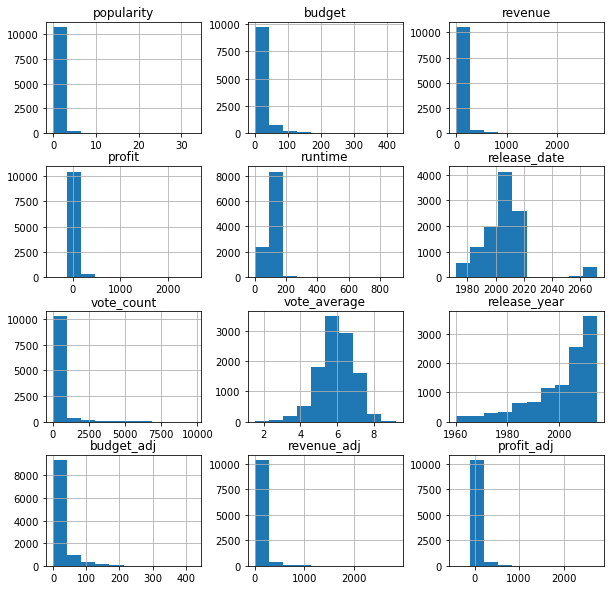

In [21]:
# Here is the histograms to check the distribution of the numeric columns of the dataset
df.drop(['id'], axis=1).hist(figsize=(10,10));

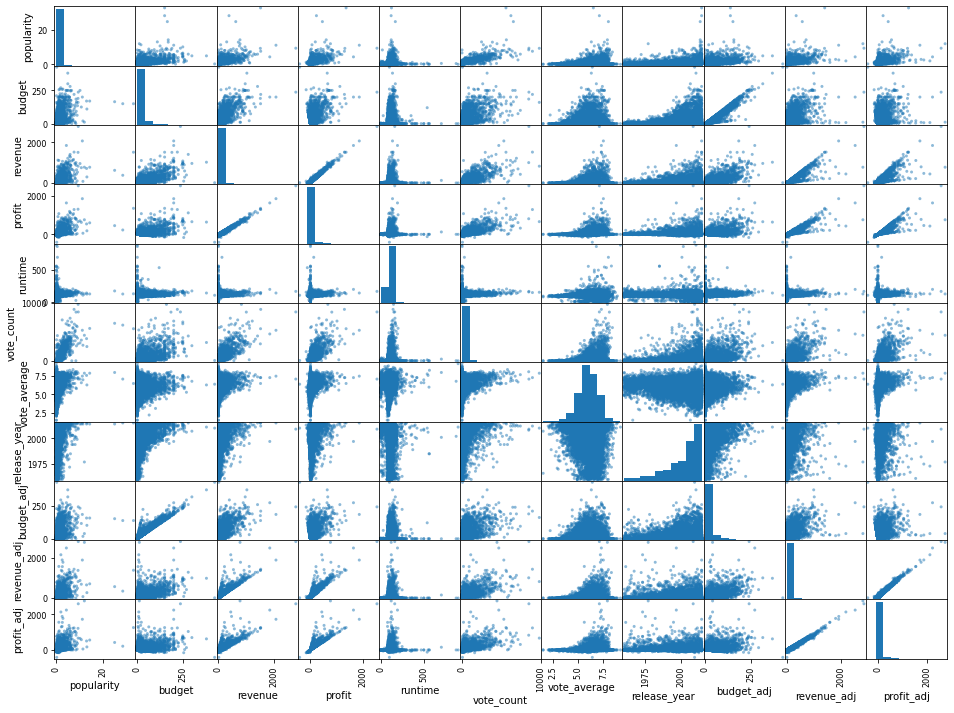

In [22]:
#here is a scatter plots between each of the variables in the dataset to determine the type of correlation that exist between them
pd.plotting.scatter_matrix(df.drop(['id'], axis=1), figsize=(16,12));

In [23]:
#I will drop the null values in cast, director, genres columns
columns = ['cast', 'director', 'genres']
df.dropna(subset = columns, how='any', inplace=True)

In [24]:
# I am removing movies with 0 minutes as runtime
df = df.query('runtime != 0')

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

###  Question 1 ( Which year has the highest release of movies?)

In [25]:
#count the number of movies in each year 
num_of_mov_yearly=df.groupby('release_year').count()['id']
num_of_mov_yearly

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     38
1968     38
1969     30
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     56
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    104
1985    108
1986    120
1987    124
1988    142
1989    135
1990    132
1991    133
1992    132
1993    177
1994    184
1995    174
1996    203
1997    191
1998    210
1999    224
2000    223
2001    241
2002    262
2003    280
2004    307
2005    359
2006    403
2007    432
2008    485
2009    524
2010    475
2011    529
2012    572
2013    644
2014    680
2015    610
Name: id, dtype: int64

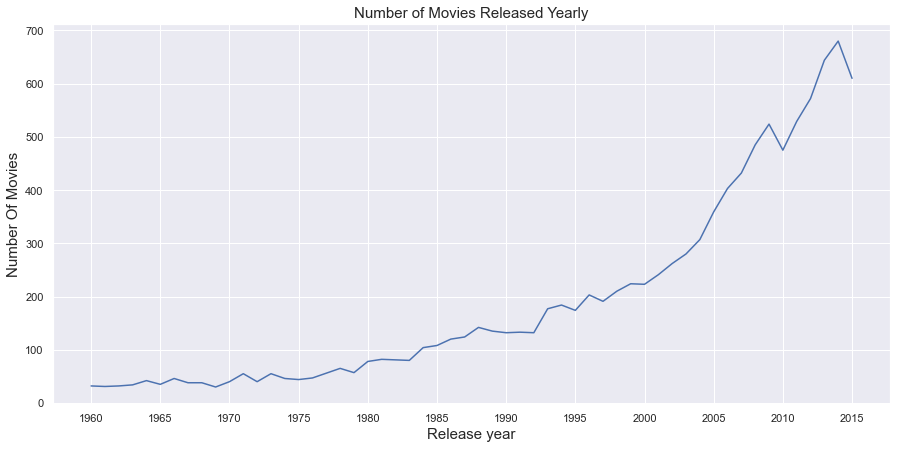

In [27]:
# A line plot of movies released in a year
num_of_mov_yearly.plot(xticks = np.arange(1960,2017,5))
sns.set(rc={'figure.figsize':(15,7)})
plt.title("Number of Movies Released Yearly",fontsize = 15)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15);

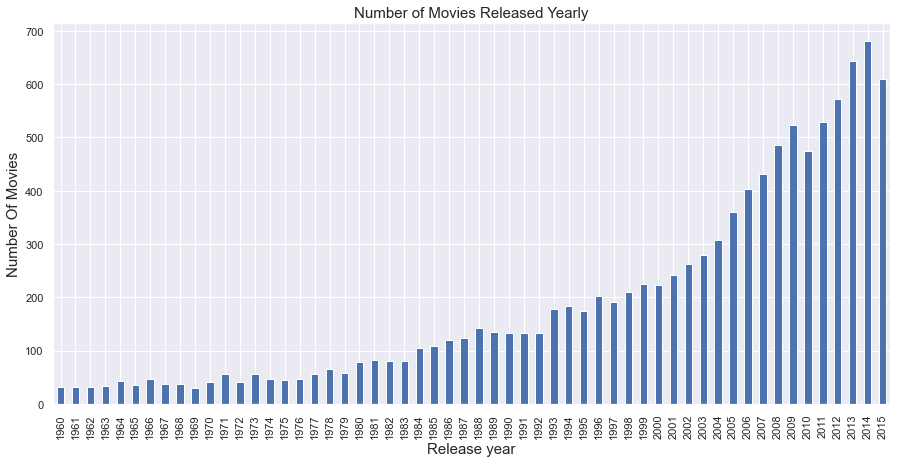

In [28]:
# A plot of movies released in a year
num_of_mov_yearly.plot.bar()
sns.set(rc={'figure.figsize':(15,7)})
plt.title("Number of Movies Released Yearly",fontsize = 15)
plt.xlabel('Release year',fontsize = 15)
plt.ylabel('Number Of Movies',fontsize = 15);

### Question 2  (Which Month Released Highest Number Of Movies In All Of The Years?)

In [29]:
#sort and count the number of movies release in each month
number_of_release=df['release_date'].dt.month.value_counts().sort_index()
number_of_release

1      888
2      679
3      811
4      789
5      804
6      819
7      789
8      906
9     1318
10    1133
11     795
12     972
Name: release_date, dtype: int64

#### I want to match each month of the year to its value.

In [30]:
#Here we match the numeric month to their respective names for easier understanding
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
#change the column name of the new dataframe 'number_of_release'
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

In [31]:
number_of_release

,number_of_release,month
1,888,Jan
2,679,Feb
3,811,Mar
4,789,Apr
5,804,May
6,819,Jun
7,789,Jul
8,906,Aug
9,1318,Sep
10,1133,Oct


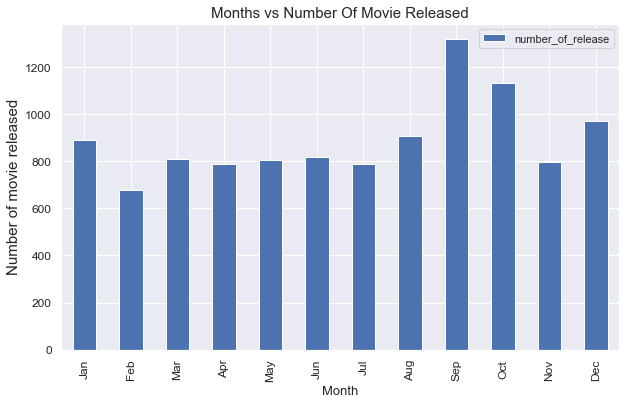

In [32]:
number_of_release.plot(x='month',kind='bar',fontsize = 12,figsize=(10,6))
#set the labels and titles of the plot.
plt.title('Months vs Number Of Movie Released',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie released',fontsize = 15);

**From the plot we can conclude that  higher number of movies are release in september and october.**

In [41]:
# a user defined function which will split string and return the count of each entry.
def string_split(x):
    #concatenate all the rows of the argument.
    string_split_all = df[x].str.cat(sep = '|')
    tot_string = pd.Series(string_split_all.split('|'))
    #counts each of the string item and return the value.
    number_in_string = tot_string.value_counts(ascending=False)
    return number_in_string

### Question 3: Which Genre Has the Highest Number of Movies Released?

In [42]:
# Using the split string function defined from above to obtain the number of movies released in each genre 
total_movie_genre = string_split('genres')
print(total_movie_genre)

Drama              4738
Comedy             3765
Thriller           2900
Action             2374
Romance            1703
Horror             1628
Adventure          1464
Crime              1352
Science Fiction    1220
Family             1212
Fantasy             907
Mystery             806
Animation           664
Documentary         467
Music               394
History             330
War                 268
Foreign             183
Western             164
TV Movie            159
dtype: int64


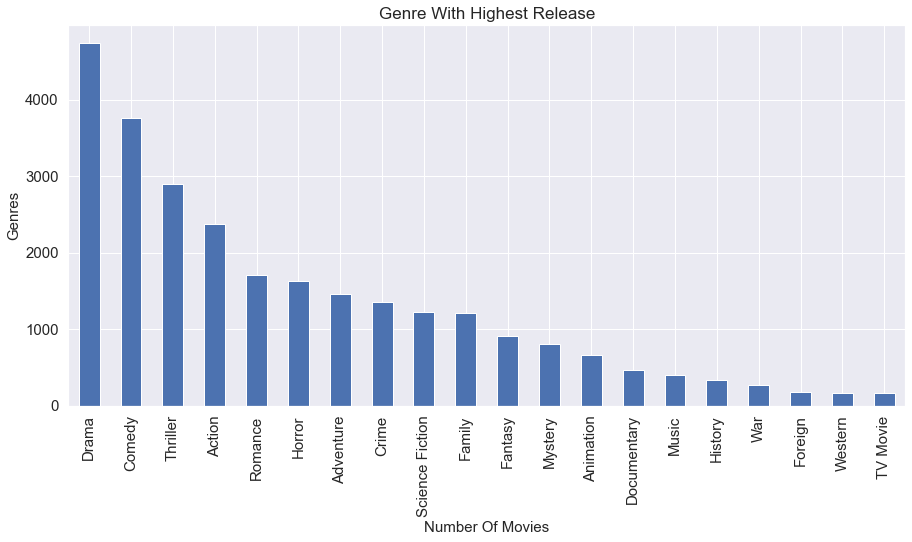

In [43]:
#I will plot 'bar' chart using plot function for 'genre vs number of movies'.
total_movie_genre.plot(kind= 'bar',figsize = (15,7),fontsize=15)
#setting  the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=17)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 15);

**From the chart above, the top movie genre are Drama, Comedy, Thriller, Action and Romance**

### Question 4: Which actor has the most appearance in movies cast?

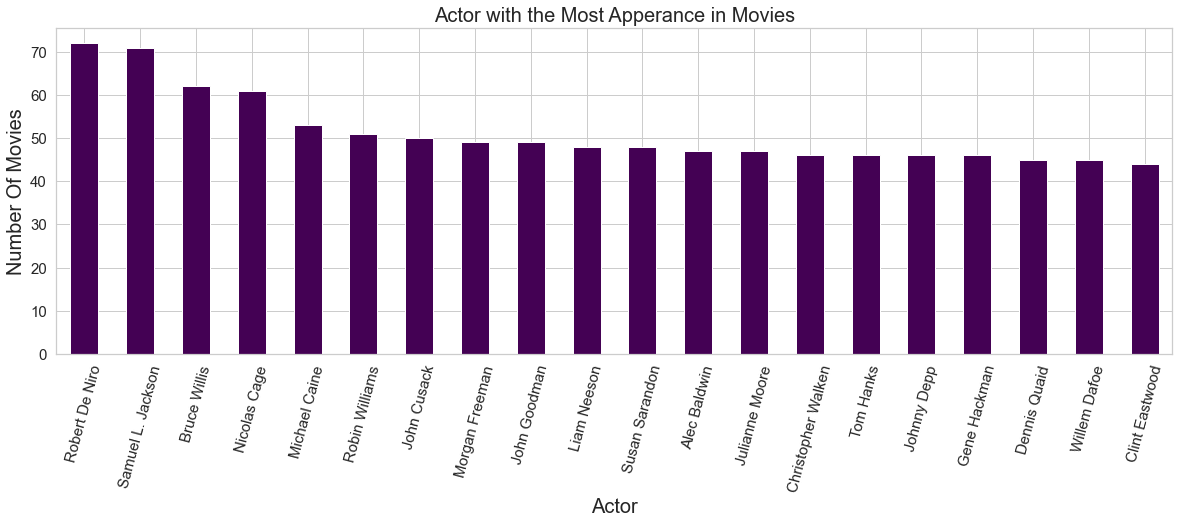

In [47]:
#Using the string_split function defined earlier, 
#it wiil be used to count number of times each actor appeared in the cast of movies . 

number_actor_flims = string_split('cast')

#plot the barh plot.
number_actor_flims.iloc[:20].plot.bar(figsize=(20,6),colormap= 'viridis',fontsize=15)

#setup the title and the labels of the plot.
plt.title("Actor with the Most Apperance in Movies",fontsize=20)
plt.xticks(rotation = 75)
plt.xlabel('Actor',fontsize=20)
plt.ylabel("Number Of Movies appeared in",fontsize= 20)
sns.set_style("whitegrid")

**We can see that Robert De Niro has appeared in most movies, closely followed by Samuel L. Jackson, before Bruce Willis**

### Question 5:What has been the budget trends over the years?

In [70]:
#to compute the mean for budget by release year.
budget_sum = df.groupby('release_year').sum()['budget']
budget_sum.head()

release_year
1960    20
1961    44
1962    52
1963    71
1964    36
Name: budget, dtype: int64

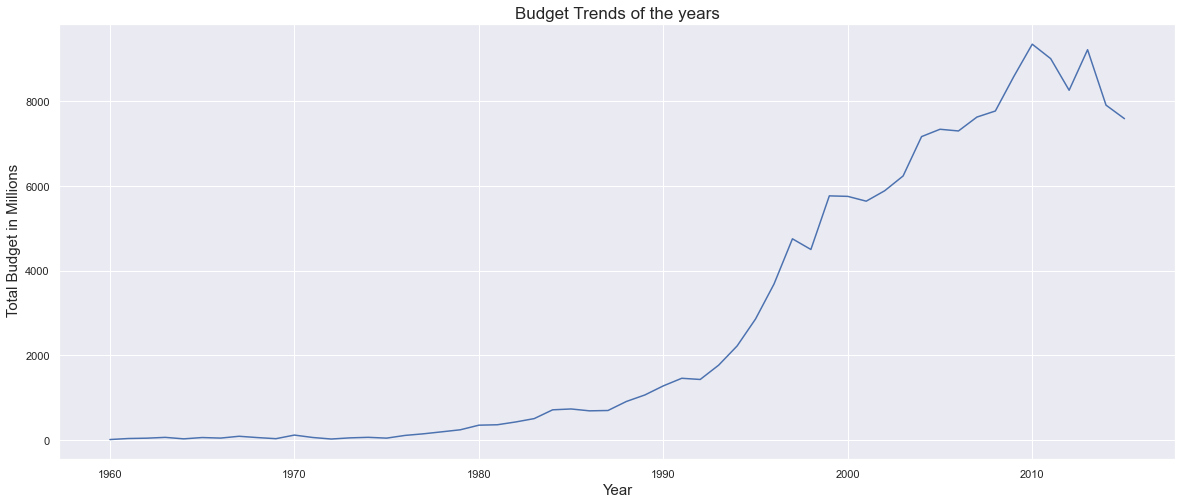

In [72]:
# here is a plot of the total budget in each year
budget_sum.plot()
#setting  the title and the labels of the plot.
plt.title("Budget Trends of the years",fontsize=17)
plt.xlabel('Year',fontsize=15)
plt.ylabel(" Total Budget in Millions",fontsize= 15);

In [ ]:
**We can see an upward increase in the total budget spent over the years which peak at year 2010**

### Question 6: What has been the revenue trends over the years?

In [74]:
#to compute the mean for budget by release year.
revenue_sum = df.groupby('release_year').sum()['revenue']
revenue_sum.head()

release_year
1960    144
1961    334
1962    214
1963    184
1964    339
Name: revenue, dtype: int64

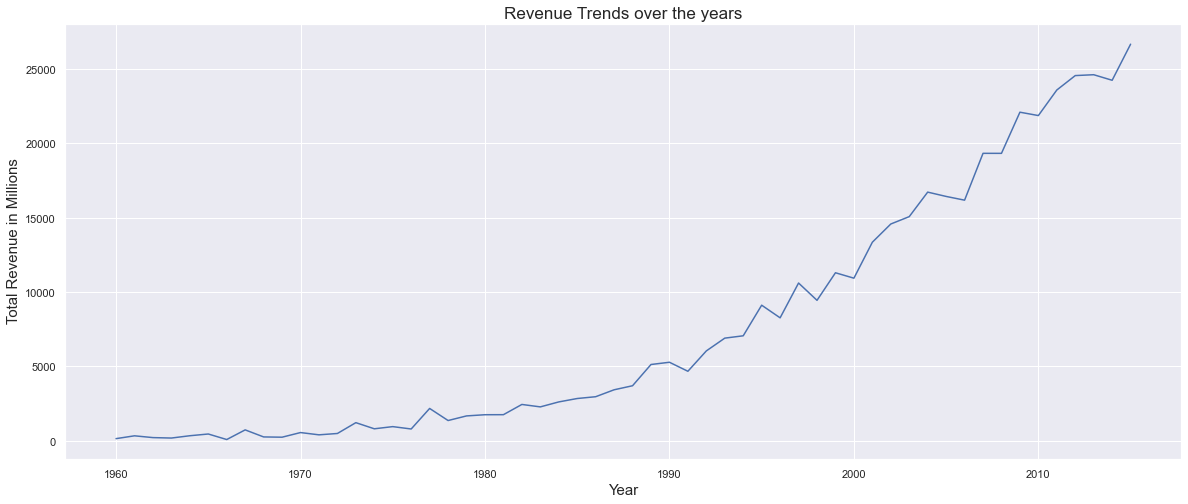

In [75]:
# here is a plot of the total revenue in each year
revenue_sum.plot()
#setting  the title and the labels of the plot.
plt.title("Revenue Trends over the years",fontsize=17)
plt.xlabel('Year',fontsize=15)
plt.ylabel(" Total Revenue in Millions",fontsize= 15);

**We can see an upward increase in the total revenue over the years.**

<a id='conclusions'></a>
## Conclusions
<ol>
    <li>Year 2004 has the highest number of movies made in a single year since 1960.</li>
    <li>September and October has the higher number of released movies from month of the year.</li>
    <li>The top movie genre made are Drama, Comedy, Thriller, Action and Romance.</li>
    <li>From the scatter plot, it can be seen that profit is positively correlated to revenue same for adjusted profit and the adjusted revenue.</li> 
    <li>Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage and Michael Caine are the top 5 actors with most appearance in movies</li>
    <li>Total budget for movies has been on the increase every year and peaks in the year 2010</li>
     <li>Total yearly Revenue from movies has been on the increase every year.</li>
</ol>


### Limitations: 

<ol>
    <li>It will be more informative and beneficial if the actual cost of these films was included in the dataset</li>
    <li>Using budget minus revenue is not the most accurate way to calculate the profit made by the movie.</li>
    <li>The zero values in the revenue, budget_adj,revenue_adj and budget columns were in excess and 
        hence making calculations related to these columns would not be a good idea because of the 
        reduced power of the dataset due to zero entries.</li>
    <li>Dropping rows with missing values may impact the overall quality of the analysis</li> 
   
</ol>


### LIST OF RESOURCES USED
1. Panda Documentation https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
2. https://matplotlib.org/stable/tutorials
3. Data Science with Python Wes Mckinney
4. https://datascienceparichay.com/